<a href="https://colab.research.google.com/github/SergeiSa/Computational-Intelligence-Slides-Fall-2020/blob/master/Google%20Colab%20notebooks/practice_05/practice_05_friction_cones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cvxpy as cp
import numpy as np
from scipy.linalg import null_space

number_of_contacts = 3

contact_points = np.random.randn(3, number_of_contacts)
contact_normals = np.random.randn(3, number_of_contacts)
contact_tangents = np.zeros((number_of_contacts, 3, 2))

for i in range(number_of_contacts):
    contact_normals[:, i] = contact_normals[:, i] / np.linalg.norm(contact_normals[:, i])
    
    left_null = null_space([contact_normals[:, i].transpose()])
    contact_tangents[i, :, :] = left_null

friction_coef = 0.5;

F = cp.Variable((3, number_of_contacts), name = 'F') # reaction forces

cost = cp.norm(cp.sum(F, 1))

constr = [cp.sum(F, 1) == np.zeros(3)]
for i in range(number_of_contacts):
    constr += [ contact_normals[:, i].T @ F[:, i] >= 0 ]
    constr += [ cp.norm( contact_tangents[i, :, :].T @ F[:, i] ) <= friction_coef * contact_normals[:, i].T @ F[:, i] ]

prob = cp.Problem(cp.Minimize(cost), constr)
prob.solve()
print("Reaction forces:\n", F.value, "\n")

Reaction forces:
 [[-3.69007115e-09 -5.05748086e-09  8.74743466e-09]
 [ 3.40433689e-11 -4.56297698e-09  4.52910183e-09]
 [-5.49358229e-09 -1.33529087e-09  6.82900216e-09]] 



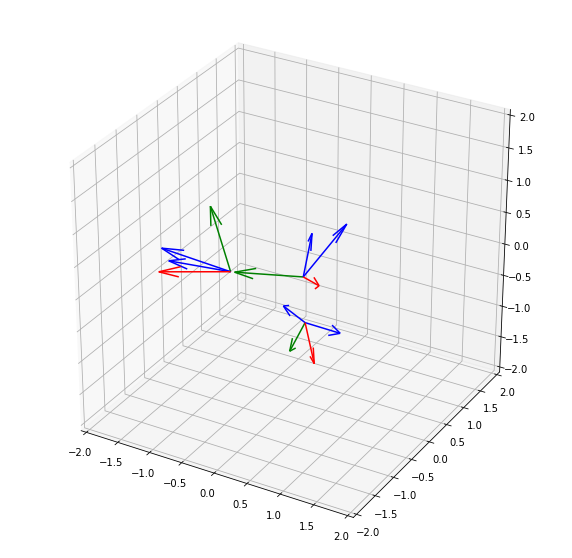

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

if F.value is not None:
    f = np.hstack([contact_points.T, (contact_points + F.value).T])
    X_f, Y_f, Z_f, U_f, V_f, W_f = zip(*f)

norm = np.hstack([contact_points.T, (contact_points + contact_normals).T])
X_norm, Y_norm, Z_norm, U_norm, V_norm, W_norm = zip(*norm)

tau_1 = np.hstack([contact_points.T, contact_points.T + contact_tangents[:, :, 0]])
X_tau_1, Y_tau_1, Z_tau_1, U_tau_1, V_tau_1, W_tau_1 = zip(*tau_1)

tau_2 = np.hstack([contact_points.T, contact_points.T + contact_tangents[:, :, 1]])    
X_tau_2, Y_tau_2, Z_tau_2, U_tau_2, V_tau_2, W_tau_2 = zip(*tau_2)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
if F.value is not None:
    ax.quiver(X_f, Y_f, Z_f, U_f, V_f, W_f, color='r', normalize=True)
ax.quiver(X_norm, Y_norm, Z_norm, U_norm, V_norm, W_norm, color='g', normalize=True)
ax.quiver(X_tau_1, Y_tau_1, Z_tau_1, U_tau_1, V_tau_1, W_tau_1, color='b', normalize=True)
ax.quiver(X_tau_2, Y_tau_2, Z_tau_2, U_tau_2, V_tau_2, W_tau_2, color='b', normalize=True)
ax.set_xlim([-2.0, 2.0])
ax.set_ylim([-2.0, 2.0])
ax.set_zlim([-2.0, 2.0])
plt.show()

In [ ]:
for i in range(number_of_contacts):
    print("Contact point", i)
    print("tau_1 dot tau_2:", np.dot(contact_tangents[i, :, 0].T, contact_tangents[i, :, 1]))
    print("tau_1 dot norm:", np.dot(contact_tangents[i, :, 0].T, contact_normals[:, i]))
    print("tau_2 dot norm:", np.dot(contact_tangents[i, :, 1].T, contact_normals[:, i]))
    print("\n")

Contact point 0
tau_1 dot tau_2: 1.3877787807814457e-17
tau_1 dot norm: -6.938893903907228e-18
tau_2 dot norm: -5.551115123125783e-17


Contact point 1
tau_1 dot tau_2: 8.673617379884035e-19
tau_1 dot norm: -5.1553813301685736e-17
tau_2 dot norm: 6.938893903907228e-18


Contact point 2
tau_1 dot tau_2: 2.7755575615628914e-17
tau_1 dot norm: -1.1102230246251565e-16
tau_2 dot norm: -1.1102230246251565e-16




In [ ]:
constr = [cp.sum(F, 1) == np.zeros(3)]
for i in range(number_of_contacts):
    constr += [ contact_normals[:, i].T @ F[:, i] >= 0 ]
    constr += [ cp.SOC(friction_coef * contact_normals[:, i].T @ F[:, i], contact_tangents[i, :, :].T @ F[:, i]) ]

prob = cp.Problem(cp.Minimize(cost), constr)
prob.solve()
print("Reaction forces:\n", F.value, "\n")

Reaction forces:
 [[-5.58386924e-10 -4.82169017e-10  1.04049303e-09]
 [-4.77675927e-11 -4.80137728e-10  5.28063144e-10]
 [-7.70489672e-10 -1.13804923e-10  8.84521265e-10]] 



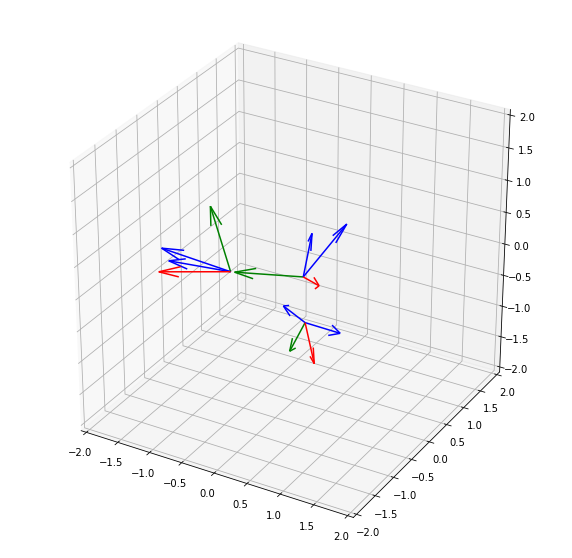

In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

if F.value is not None:
    f = np.hstack([contact_points.T, (contact_points + F.value).T])
    X_f, Y_f, Z_f, U_f, V_f, W_f = zip(*f)

norm = np.hstack([contact_points.T, (contact_points + contact_normals).T])
X_norm, Y_norm, Z_norm, U_norm, V_norm, W_norm = zip(*norm)

tau_1 = np.hstack([contact_points.T, contact_points.T + contact_tangents[:, :, 0]])
X_tau_1, Y_tau_1, Z_tau_1, U_tau_1, V_tau_1, W_tau_1 = zip(*tau_1)

tau_2 = np.hstack([contact_points.T, contact_points.T + contact_tangents[:, :, 1]])    
X_tau_2, Y_tau_2, Z_tau_2, U_tau_2, V_tau_2, W_tau_2 = zip(*tau_2)

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
if F.value is not None:
    ax.quiver(X_f, Y_f, Z_f, U_f, V_f, W_f, color='r', normalize=True)
ax.quiver(X_norm, Y_norm, Z_norm, U_norm, V_norm, W_norm, color='g', normalize=True)
ax.quiver(X_tau_1, Y_tau_1, Z_tau_1, U_tau_1, V_tau_1, W_tau_1, color='b', normalize=True)
ax.quiver(X_tau_2, Y_tau_2, Z_tau_2, U_tau_2, V_tau_2, W_tau_2, color='b', normalize=True)
ax.set_xlim([-2.0, 2.0])
ax.set_ylim([-2.0, 2.0])
ax.set_zlim([-2.0, 2.0])
plt.show()